In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #Nowa biblioteka do statystyk
print("Biblioteki statystyczne zaimportowane.")

Biblioteki statystyczne zaimportowane.


In [5]:
dochody = np.array([5,6,7,5,8,9,6,10,15,7,6,50])
print(f"Średnia: {np.mean(dochody)}")

Średnia: 11.166666666666666


Średni dochód pracownika firmy wynosi ~11.16. Wartość zafałszowana przez pensję osób zarabiających dużo więcej niż pozostali (wartość: 50 i 15)

In [6]:
print(f"Mediana: {np.median(dochody)}")

Mediana: 7.0


Po uszeregowaniu wartości od najmniejszej do największej środowka z nich wynosi 7, co stanowi mediane.

In [7]:
df = pd.Series(dochody)
moda_df = df.mode()
print(f"Moda: {moda_df.values}")

Moda: [6]


Najwięcej osób wśród pracowników zarabia 6 tys. - tyle wynosi moda.

In [25]:
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
zakres = np.max(czas_reakcji) - np.min(czas_reakcji)
print(f"Zakres czasu reakcji: {zakres}")

Zakres czasu reakcji: 55


Zakres czasu reakcji obliczany jako różnica między wartościami skrajnymi (maksymalną i minimalną).

In [26]:
#Wariancja obliczona w NumPy
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
wariancja_np = np.var(czas_reakcji, ddof=1) #ddof=1 to wartość przy obliczaniu wyniku dla próby (jest to wartość domyślna), ddof=0 wykorzystujemy gdy statystyka jest obliczana dla populacji
print(f"Wariancja (Obliczona w NumPy dla próby): {wariancja_np}")

Wariancja (Obliczona w NumPy dla próby): 231.95555555555555


Wariancja obliczana na podstawie próby z pomiaru reakcji czasu graczy. Kalkulacje wykonano odejmując od każdej z wartości umieszczonej w tablicy średnią (xi−x)[xi - każda wartość w tablicy odejmowana w kolejnych iteracjach, x - wartość średniej], następnie wartość każdego z odchyleń podniesiono do kwadratu ((xi-x)^2), na koniec sumowano wszystkie wartości podniesione do kwadratu i podzielono przez liczbę prób - 1

In [27]:
#Ta sama wariancja obliczona w Pandas
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
df_czas = pd.DataFrame({'czas_reakcji': czas_reakcji})
wariancja_pd = df_czas['czas_reakcji'].var()
print(f"Wariancja (Obliczona w Pandas dla próby):  {wariancja_pd}")

Wariancja (Obliczona w Pandas dla próby):  231.95555555555555


In [28]:
#Odchylenie standardowe w NumPy
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
odchylenie_np = np.std(czas_reakcji, ddof=1) #ddof=1 to standard dla próby (domyślna wartość), ddof=0 wartość dla populacji
print(f"Odchylenie standarowe dla próby: {odchylenie_np}")

Odchylenie standarowe dla próby: 15.230087181482434


In [ ]:
Pierwiastek kwadratowy z wariancji. 

In [29]:
#Odchylenie standardowe w Pandas
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
df_odchylenie = pd.DataFrame({'czas_reakcji': czas_reakcji})
odchylenie_pd = df_odchylenie['czas_reakcji'].std()
print(f"Odchylenie standardowe dla próby: {odchylenie_pd}")

Odchylenie standardowe dla próby: 15.230087181482434


In [30]:
#Obliczenie kwartyli i rozstępu międzykwartylowego z użyciem Numpy (IQR - Interqurtile Range)

czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
Q1_np = np.percentile(czas_reakcji, 25)
Q3_np = np.percentile(czas_reakcji, 75)
IQR_np = Q3_np - Q1_np
print(f"Q1: {Q1_np}")
print(f"Q3: {Q3_np}")
print(f"IQR: {IQR_np}")


Q1: 155.75
Q3: 168.75
IQR: 13.0


Kwartyle dzielą zbiór na 4 równe części. Obliczenie wykorzystuje 25 i 75 percentyl obliczając różnice z nich. Pozwala to na wyeliminowanie wpływu wartości skrajnych z rozproszenia.

In [33]:
#Obliczenie kwartyli i rozstępu międzykwartylowego z użyciem Pandas (IQR - Interqurtile Range)

czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
df_czas = pd.DataFrame({'czas_reakcji': czas_reakcji})
opis_danych = df_czas.describe()
print(f"\nOpis danych:")
print(opis_danych)

Q1_pd = opis_danych.loc['25%', 'czas_reakcji']
Q3_pd = opis_danych.loc['75%', 'czas_reakcji']
IQR_pd = Q3_pd - Q1_pd
print(f"Q1: {Q1_pd}")
print(f"Q3: {Q3_pd}")
print(f"IQR: {IQR_pd}")


Opis danych:
       czas_reakcji
count     10.000000
mean     163.800000
std       15.230087
min      145.000000
25%      155.750000
50%      161.500000
75%      168.750000
max      200.000000
Q1: 155.75
Q3: 168.75
IQR: 13.0


In [35]:
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])

skosnosc = skew(czas_reakcji)
kurtoza = kurtosis(czas_reakcji)
print(f"Czas reakcji - Skośność: {skosnosc}, Kurtoza: {kurtoza}")

Czas reakcji - Skośność: 1.2606489858171515, Kurtoza: 1.3408596921039688


Skośność dodatnia (> 0) - rozkład skośny prawostronnie (ogon rozciągnięty w prawo), średnia > mediana > moda
Kurtoza > 0 (Leptokurtyczna) - ogony grubsze, niż w rozkładzie normalnym. Znaczna liczba wartości odstających.

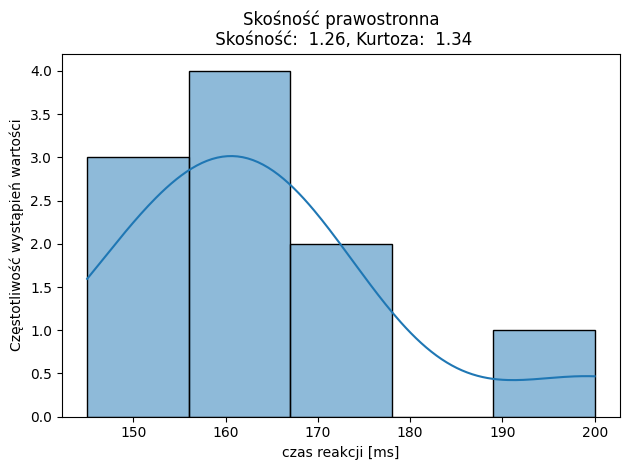

In [42]:
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])

sns.histplot(czas_reakcji, kde=True)
plt.title(f"Skośność prawostronna\n Skośność: {skosnosc: .2f}, Kurtoza: {kurtoza: .2f}")
plt.xlabel("czas reakcji [ms]")
plt.ylabel("Częstotliwość wystąpień wartości")
plt.tight_layout()
plt.show()

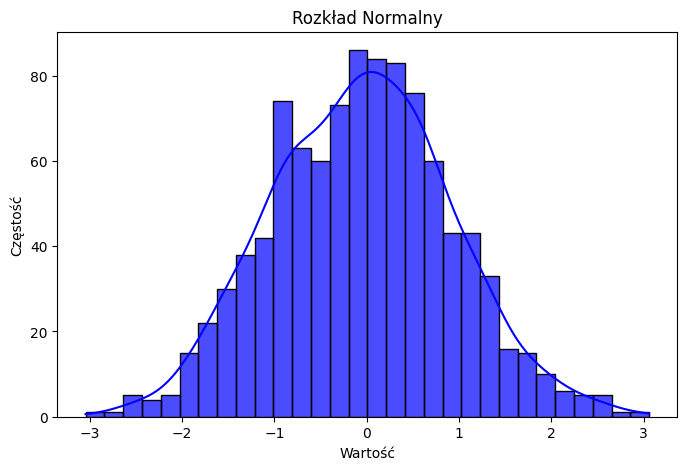

Gęstość prawdopodobieństwa dla x=0 w standardowym rozkładzie normalnym: 0.399
Gęstość prawdopodobieństwa dla x=1 w standardowym rozkładzie normalnym: 0.242


In [54]:
# Generowanie danych z rozkładu normalnego
# loc = średnia, scale = odchylenie standardowe, size = liczba próbek
dane_normalne = np.random.normal(loc=0, scale=1, size=1000) # Standardowy rozkład normalny (średnia 0, odch. std 1)

# Wizualizacja histogramu
plt.figure(figsize=(8, 5))
sns.histplot(dane_normalne, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Rozkład Normalny')
plt.xlabel('Wartość')
plt.ylabel('Częstość')
plt.show()

# Prawdopodobieństwo (funkcja gęstości prawdopodobieństwa - PDF)
# Zobaczymy, jak SciPy pozwala obliczyć PDF w dowolnym punkcie
x_wartosc = 0
pdf_wartosc = stats.norm.pdf(x_wartosc, loc=0, scale=1)
print(f"Gęstość prawdopodobieństwa dla x=0 w standardowym rozkładzie normalnym: {pdf_wartosc:.3f}")

x_wartosc = 1
pdf_wartosc_1 = stats.norm.pdf(x_wartosc, loc=0, scale=1)
print(f"Gęstość prawdopodobieństwa dla x=1 w standardowym rozkładzie normalnym: {pdf_wartosc_1:.3f}")

Kurtoza wynosi: 0.09152007187478794
Skośność jest równa: -0.011756886809160032


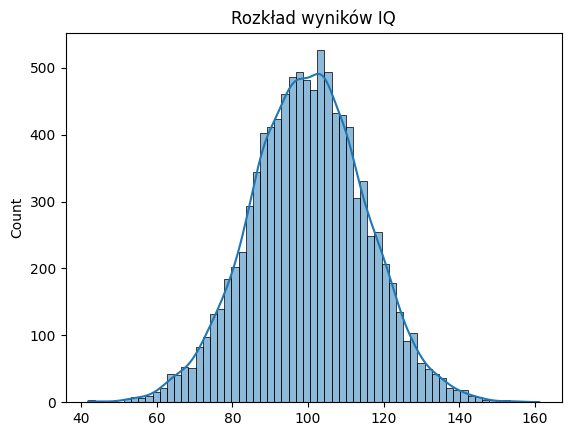

In [46]:
# Generowanie danych z rozkładu normalnego
# loc = średnia, scale = odchylenie standardowe, size = liczba próbek

rozklad_normalny = np.random.normal(loc=100, scale=15, size=10000)
sns.histplot(rozklad_normalny, kde=True)
plt.title("Rozkład wyników IQ")
skosnosc = skew(rozklad_normalny)
kurtoza = kurtosis(rozklad_normalny)
print(f"Kurtoza wynosi: {kurtoza}\nSkośność jest równa: {skosnosc}")


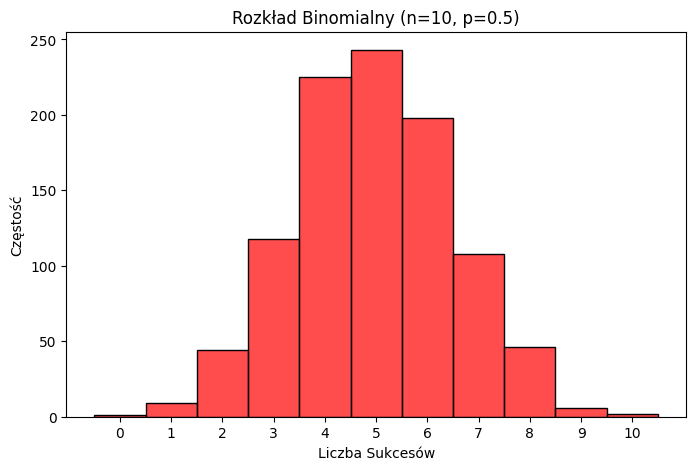

Prawdopodobieństwo 5 sukcesów w 10 próbach (p=0.5): 0.246


In [55]:
# Generowanie danych z rozkładu binomialnego
# np. liczba sukcesów w 10 próbach, gdzie p = 0.5 (szansa na sukces w każdej próbie)
n_prob = 10 # liczba rzutów monetą
p_sukces = 0.5 # prawdopodobieństwo wypadnięcia orła
dane_binomialne = np.random.binomial(n=n_prob, p=p_sukces, size=1000)

# Wizualizacja histogramu (dla dyskretnych danych częściej używa się barplot lub histplot z odpowiednimi bins)
plt.figure(figsize=(8, 5))
sns.histplot(dane_binomialne, bins=np.arange(n_prob + 2) - 0.5, stat='count', color='red', alpha=0.7)
# bins: -0.5, 0.5, 1.5... żeby słupki były centrowane na wartościach całkowitych
# stat='count' (domyślny dla histplot) lub 'probability'
plt.title(f'Rozkład Binomialny (n={n_prob}, p={p_sukces})')
plt.xlabel('Liczba Sukcesów')
plt.ylabel('Częstość')
plt.xticks(np.arange(n_prob + 1)) # Ustawienie etykiet dla liczb całkowitych
plt.show()

# Prawdopodobieństwo (funkcja masy prawdopodobieństwa - PMF)
# Prawdopodobieństwo uzyskania 5 sukcesów w 10 próbach z p=0.5
pmf_binomialny = stats.binom.pmf(k=5, n=n_prob, p=p_sukces) # k = liczba sukcesów
print(f"Prawdopodobieństwo 5 sukcesów w 10 próbach (p=0.5): {pmf_binomialny:.3f}")

   moda
0    10


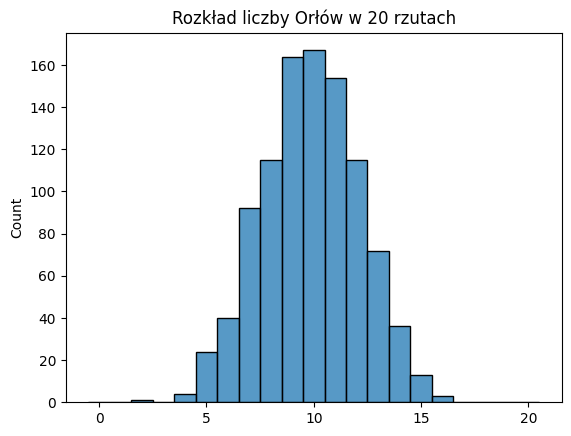

In [53]:
# Generowanie danych z rozkładu binomialnego
# Liczba sukcesów w 20 próbach, gdzie p = 0.5 (szansa na sukces w każdej próbie)

n_prob = 20 #liczba rzutów monetą
p_sukces = 0.5 #prawdopodobieństwo wypadnięcia orła

dane_binomialne = np.random.binomial(n=n_prob, p=p_sukces, size=1000)
sns.histplot(dane_binomialne, bins=np.arange(n_prob+2)-0.5, stat='count')
plt.title("Rozkład liczby Orłów w 20 rzutach")
df = pd.DataFrame({'moda':dane_binomialne})
print(df.mode())

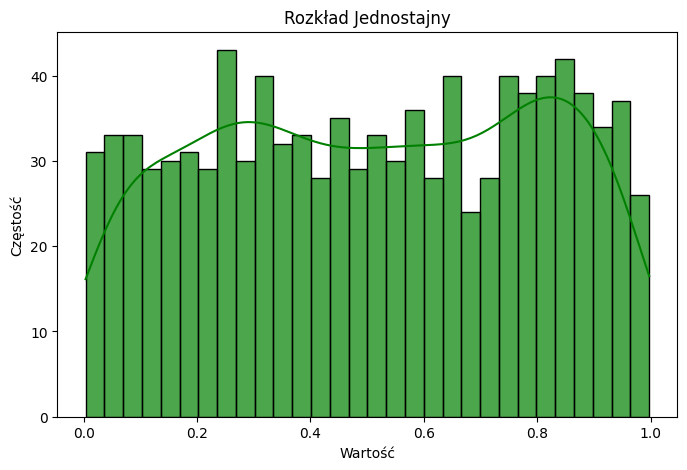

Gęstość prawdopodobieństwa dla x=0.5 w rozkładzie jednostajnym (0,1): 1.000


In [57]:
# Generowanie danych z rozkładu jednostajnego (od 0 do 1)
dane_jednostajne = np.random.uniform(low=0, high=1, size=1000)

# Wizualizacja histogramu
plt.figure(figsize=(8, 5))
sns.histplot(dane_jednostajne, kde=True, bins=30, color='green', alpha=0.7)
plt.title('Rozkład Jednostajny')
plt.xlabel('Wartość')
plt.ylabel('Częstość')
plt.show()

# PDF dla rozkładu jednostajnego
# Prawdopodobieństwo w dowolnym punkcie w przedziale jest stałe
pdf_jednostajny = stats.uniform.pdf(0.5, loc=0, scale=1) # loc=a, scale=(b-a)
print(f"Gęstość prawdopodobieństwa dla x=0.5 w rozkładzie jednostajnym (0,1): {pdf_jednostajny:.3f}")